In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rollercoaster-database/coaster_db.csv
/kaggle/input/rollercoaster-database/flipflap.jpg


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as  sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print('hello')

hello


In [4]:
df=pd.read_csv('../input/rollercoaster-database/coaster_db.csv')

In [5]:
df.shape

(1087, 56)

In [6]:
df.head(20)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
df=df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
       #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 
    #'Opened', 
    #'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      # 'Single rider line available', 'Restraint Style',
      # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [8]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [9]:
df.describe()

,year_introduced,latitude,longitude,speed_mph,height_ft,Inversions_clean,Gforce_clean
count,1087.000000,812.000000,812.000000,937.000000,171.000000,1087.000000,362.000000
mean,1994.986201,38.373484,-41.595373,48.617289,101.996491,1.326587,3.824006
std,23.475248,15.516596,72.285227,16.678031,67.329092,2.030854,0.989998
min,1884.000000,-48.261700,-123.035700,5.000000,13.100000,0.000000,0.800000
25%,1989.000000,35.031050,-84.552200,37.300000,51.800000,0.000000,3.400000
50%,2000.000000,40.289800,-76.653600,49.700000,91.200000,0.000000,4.000000
75%,2010.000000,44.799600,2.778100,58.000000,131.200000,2.000000,4.500000
max,2022.000000,63.230900,153.426500,149.100000,377.300000,14.000000,12.000000


In [10]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [11]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [12]:
df=df.rename(columns={'coaster_name':'Coaster_Name','year_introduced':'Year_Introduced'})

In [13]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [15]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [16]:
df.query('Coaster_Name=="Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [17]:
df=df.loc[~df.duplicated(subset=['Coaster_Name','Location','opening_date_clean'])]\
.reset_index(drop=True)

In [18]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

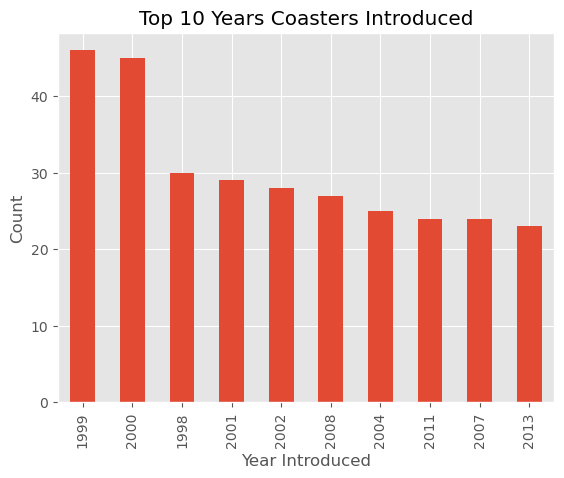

In [19]:
ax=df['Year_Introduced'].value_counts()\
.head(10)\
.plot(kind='bar',title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

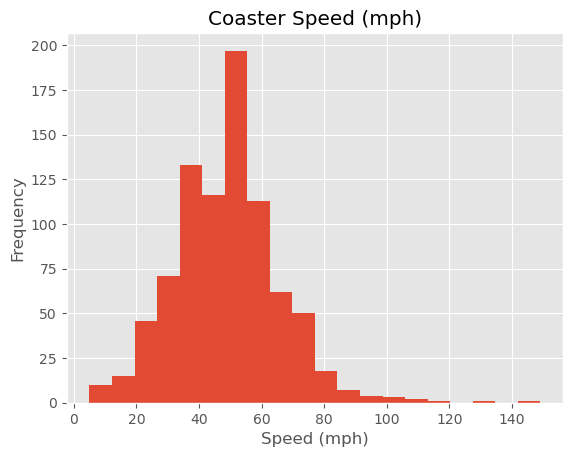

In [20]:
ax=df['speed_mph'].plot(kind='hist',bins=20,title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

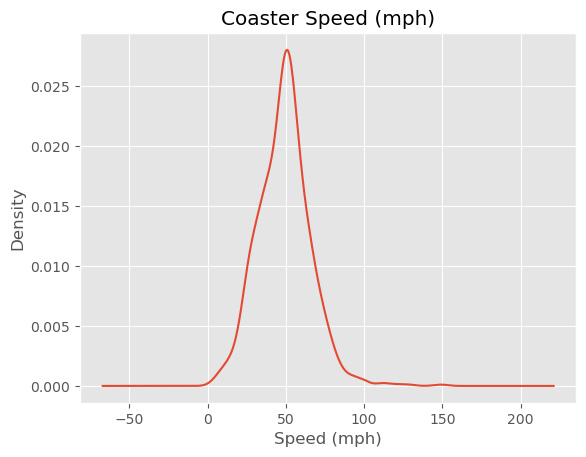

In [21]:
ax=df['speed_mph'].plot(kind='kde',title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

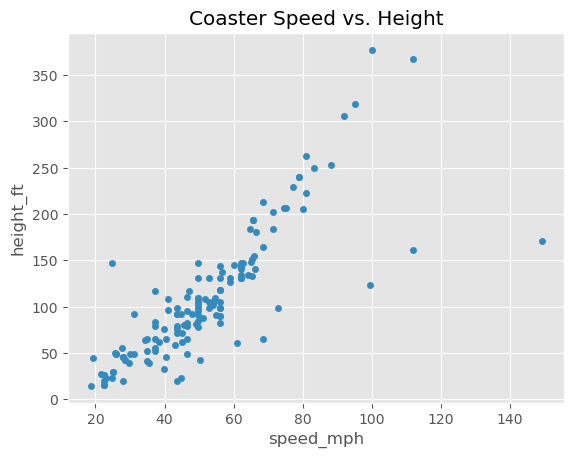

In [22]:
df.plot(kind='scatter',x='speed_mph',y='height_ft',title='Coaster Speed vs. Height')
plt.show()

<Axes: xlabel='speed_mph', ylabel='height_ft'>

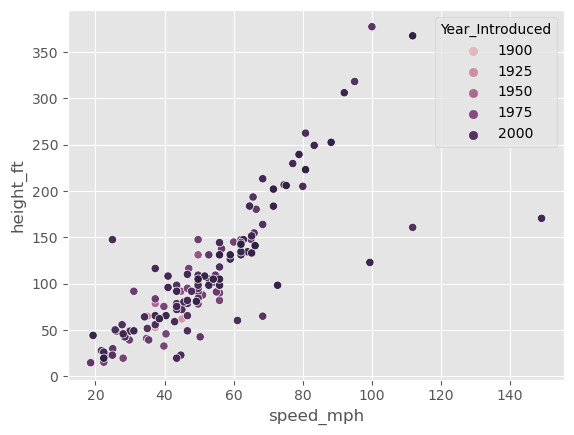

In [23]:
sns.scatterplot(x='speed_mph',y='height_ft',hue='Year_Introduced',data=df)